# I.Data Preparing

In [ ]:
## Step1
## 跑psm需要的数据【实验组】 第一周买会员的人
## 跑完之后暂存为dp_det_data.member_first_wk_test
## 下载后读入csv为treated
"""
select 
a.*, 'first_wk' as period,
mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,
wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,
is_new_core_rolling,
city_id,
wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,
wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after
from 
(select passenger_id,dt    --第一周购买的用户
from gulf_bi.gulf_member_daily_list 
where dt between '2022-05-26' and date_add('2022-05-26',6)
) as a 
left join 
(select passenger_id,   --购买前一周&一个月的行为，用于匹配
count(distinct case when is_td_finish_flag=1 then order_id end) as mth_finish,
count(distinct case when is_gulf_finish=1 then order_id end) as mth_gulf_finish,
count(distinct case when is_td_call_flag=1 and source_type<>2 then order_id end) as mth_call,
count(distinct case when is_td_call_flag=1 and source_type<>2 and is_gulf=1 then order_id end) as mth_gulf_call,

count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_finish_flag=1 then order_id end) as wk_finish,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_gulf_finish=1 then order_id end) as wk_gulf_finish,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_call_flag=1 and source_type<>2 then order_id end) as wk_call,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_call_flag=1 and source_type<>2 and is_gulf=1 then order_id end) as wk_gulf_call

from gulf_bi.gulf_enjoy_order_base
where dt between date_sub('2022-05-26',31) and date_sub('2022-05-26',1)

group by passenger_id 
) as b 
on a.passenger_id=b.passenger_id 

left join 
(select passenger_id,  --购买后表现，用于评估

count(distinct case when dt between date_add('2022-05-26',0) and date_add('2022-05-26',6)  and is_td_finish_flag=1 then order_id end) as wk1_finish_after,
count(distinct case when dt between date_add('2022-05-26',7) and date_add('2022-05-26',13)  and is_td_finish_flag=1 then order_id end) as wk2_finish_after,
count(distinct case when dt between date_add('2022-05-26',14) and date_add('2022-05-26',20)  and is_td_finish_flag=1 then order_id end) as wk3_finish_after,
count(distinct case when dt between date_add('2022-05-26',21) and date_add('2022-05-26',27)  and is_td_finish_flag=1 then order_id end) as wk4_finish_after,

count(distinct case when dt between date_add('2022-05-26',0) and date_add('2022-05-26',6)  and is_gulf_finish=1 then order_id end) as wk1_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',7) and date_add('2022-05-26',13)  and is_gulf_finish=1 then order_id end) as wk2_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',14) and date_add('2022-05-26',20)  and is_gulf_finish=1 then order_id end) as wk3_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',21) and date_add('2022-05-26',27)  and is_gulf_finish=1 then order_id end) as wk4_gulf_finish_after
from gulf_bi.gulf_enjoy_order_base
where dt between '2022-05-26' and date_add('2022-05-26',27)
group by passenger_id 
) as bb  

on a.passenger_id=bb.passenger_id 

left join --购买前用户身份，用于匹配
(select passenger_id, is_new_core_rolling 
from gulf_bi.new_core_pas_tag_rolling
where dt =date_sub('2022-05-26',1)
) as p 
on a.passenger_id=p.passenger_id 
left join 
(
select  --用户常驻城市，用于匹配或筛选
pid,
cast(resident_city_id1 as bigint) as city_id
from dm.passenger_resident_city
where concat_ws('-',year,month,day)=date_sub('2022-05-26',1)
) as city 
on a.passenger_id=city.pid
"""


In [ ]:
## Step 2
## 跑psm需要的数据【对照组】
## 跑完之后暂存为dp_det_data.non_member_first_wk_ctrl
"""
select 
a.*, 'first_wk' as period,
mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,
wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,
is_new_core_rolling,
city_id,
wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,
wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after
from 
(select distinct passenger_id, '2022-01-01' as dt
from gulf_bi.gulf_enjoy_order_base
where dt between '2022-03-01' and date_add('2022-05-26',1)
and is_td_finish_flag=1
) as a 
left join 
(select passenger_id, 
count(distinct case when is_td_finish_flag=1 then order_id end) as mth_finish,
count(distinct case when is_gulf_finish=1 then order_id end) as mth_gulf_finish,
count(distinct case when is_td_call_flag=1 and source_type<>2 then order_id end) as mth_call,
count(distinct case when is_td_call_flag=1 and source_type<>2 and is_gulf=1 then order_id end) as mth_gulf_call,

count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_finish_flag=1 then order_id end) as wk_finish,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_gulf_finish=1 then order_id end) as wk_gulf_finish,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_call_flag=1 and source_type<>2 then order_id end) as wk_call,
count(distinct case when dt between date_sub('2022-05-26',7) and date_sub('2022-05-26',1)  and is_td_call_flag=1 and source_type<>2 and is_gulf=1 then order_id end) as wk_gulf_call

from gulf_bi.gulf_enjoy_order_base
where dt between date_sub('2022-05-26',31) and date_sub('2022-05-26',1)

group by passenger_id 
) as b 
on a.passenger_id=b.passenger_id 

left join 
(select passenger_id, 
count(distinct case when dt between date_add('2022-05-26',0) and date_add('2022-05-26',6)  and is_td_finish_flag=1 then order_id end) as wk1_finish_after,
count(distinct case when dt between date_add('2022-05-26',7) and date_add('2022-05-26',13)  and is_td_finish_flag=1 then order_id end) as wk2_finish_after,
count(distinct case when dt between date_add('2022-05-26',14) and date_add('2022-05-26',20)  and is_td_finish_flag=1 then order_id end) as wk3_finish_after,
count(distinct case when dt between date_add('2022-05-26',21) and date_add('2022-05-26',27)  and is_td_finish_flag=1 then order_id end) as wk4_finish_after,

count(distinct case when dt between date_add('2022-05-26',0) and date_add('2022-05-26',6)  and is_gulf_finish=1 then order_id end) as wk1_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',7) and date_add('2022-05-26',13)  and is_gulf_finish=1 then order_id end) as wk2_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',14) and date_add('2022-05-26',20)  and is_gulf_finish=1 then order_id end) as wk3_gulf_finish_after,
count(distinct case when dt between date_add('2022-05-26',21) and date_add('2022-05-26',27)  and is_gulf_finish=1 then order_id end) as wk4_gulf_finish_after
from gulf_bi.gulf_enjoy_order_base
where dt between '2022-05-26' and date_add('2022-05-26',27)

group by passenger_id 
) as bb  

on a.passenger_id=bb.passenger_id 


left join 
(select passenger_id, is_new_core_rolling 
from gulf_bi.new_core_pas_tag_rolling
where dt =date_sub('2022-05-26',1)
) as p 
on a.passenger_id=p.passenger_id 
left join 
(
select   --对照组剔除所有买过付费会员的人
pid,
cast(resident_city_id1 as bigint) as city_id
from dm.passenger_resident_city
where concat_ws('-',year,month,day)=date_sub('2022-05-26',1)
) as city 
on a.passenger_id=city.pid 
left join 
(select distinct passenger_id
from gulf_bi.gulf_member_daily_list 
where dt between '2022-05-26' and current_date
) as member 
on a.passenger_id=member.passenger_id 
where member.passenger_id is null
and city_id in (2,5,6,23,35,86)
"""

In [ ]:
## Step 3 
## 对照组太多需要抽样,实验组可以取全部
## 下载后读入csv为ctrl
"""
with raw as 
(select
city_id,
ceiling(mth_finish/10) as mth_finish_cat,
ceiling(mth_gulf_finish/10) as mth_gulf_finish_cat,
count(distinct passenger_id) as test_pnum 
from dp_det_data.member_first_wk_test
group by city_id, 
ceiling(mth_finish/10) ,
ceiling(mth_gulf_finish/10) 
) 

select a.*
from 
(select 
*, 
ceiling(mth_finish/10) as mth_finish_cat,
ceiling(mth_gulf_finish/10) as mth_gulf_finish_cat,
rank() over (partition by ceiling(mth_finish/10),ceiling(mth_gulf_finish/10),city_id order by rand()) as rk 
from dp_det_data.non_member_first_wk_ctrl
) as a 
right join 
raw 
on a.city_id=raw.city_id and a.mth_finish_cat=raw.mth_finish_cat and a.mth_gulf_finish_cat=raw.mth_gulf_finish_cat
where rk<=test_pnum*200
"""

# II.Evaluation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/Users/didi/Downloads/simsun.ttc')

import patsy
import sys
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

In [224]:
pd.set_option('display.max_columns',None)

In [222]:
treated = pd.read_csv('/Users/didi/Downloads/first_wk_test_v2.csv').fillna(0)
treated['is_member']=1
control = pd.read_csv('/Users/didi/Downloads/first_wk_ctrl_v2.csv').fillna(0)
control['is_member']=0
control=control.drop(['mth_finish_cat','mth_gulf_finish_cat','rk'],axis=1)

df=pd.concat([treated,control])
df=df.drop_duplicates()  # 数据去重
df=df.fillna(0)
df=df.reset_index()
df.head()

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after,is_member
0,0,379401,2022-06-01,first_wk,19.0,7.0,25.0,10.0,2.0,0.0,2.0,0.0,1.0,2.0,7.0,6.0,1.0,8.0,4.0,4.0,1.0,5.0,1
1,1,1567137,2022-05-27,first_wk,14.0,14.0,14.0,14.0,4.0,4.0,4.0,4.0,1.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,4.0,5.0,1
2,2,1738957,2022-05-29,first_wk,17.0,10.0,17.0,10.0,3.0,3.0,3.0,3.0,1.0,5.0,14.0,2.0,2.0,8.0,8.0,1.0,2.0,7.0,1
3,3,2300155,2022-05-27,first_wk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1
4,4,2603139,2022-05-26,first_wk,66.0,66.0,69.0,68.0,20.0,20.0,22.0,22.0,1.0,2.0,18.0,6.0,13.0,14.0,18.0,6.0,13.0,14.0,1


In [225]:
df.columns

Index(['index', 'passenger_id', 'dt', 'period', 'mth_finish',
       'mth_gulf_finish', 'mth_call', 'mth_gulf_call', 'wk_finish',
       'wk_gulf_finish', 'wk_call', 'wk_gulf_call', 'is_new_core_rolling',
       'city_id', 'wk1_finish_after', 'wk2_finish_after', 'wk3_finish_after',
       'wk4_finish_after', 'wk1_gulf_finish_after', 'wk2_gulf_finish_after',
       'wk3_gulf_finish_after', 'wk4_gulf_finish_after', 'is_member'],
      dtype='object')

In [314]:
pd.set_option('display.max_rows',None)
pd.DataFrame(treated.groupby('city_id').passenger_id.count().sort_values(ascending=False))

,passenger_id
city_id,
2.0,2362
5.0,1730
6.0,533
23.0,279
1.0,145
35.0,77
4.0,66
3.0,63
17.0,59


## 一、总体评估 (第一周）

In [270]:
#PSM total
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df
#data_p=df[df.city_id==2]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7619822752758184, 0.7609875203472599, 0.7641526496654006, 0.7675890757822391, 0.7665943208536806, 0.7619822752758184]


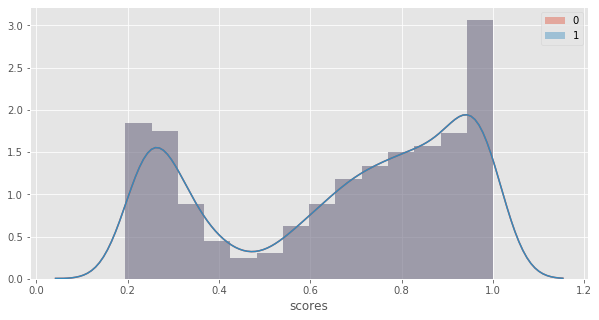

In [228]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

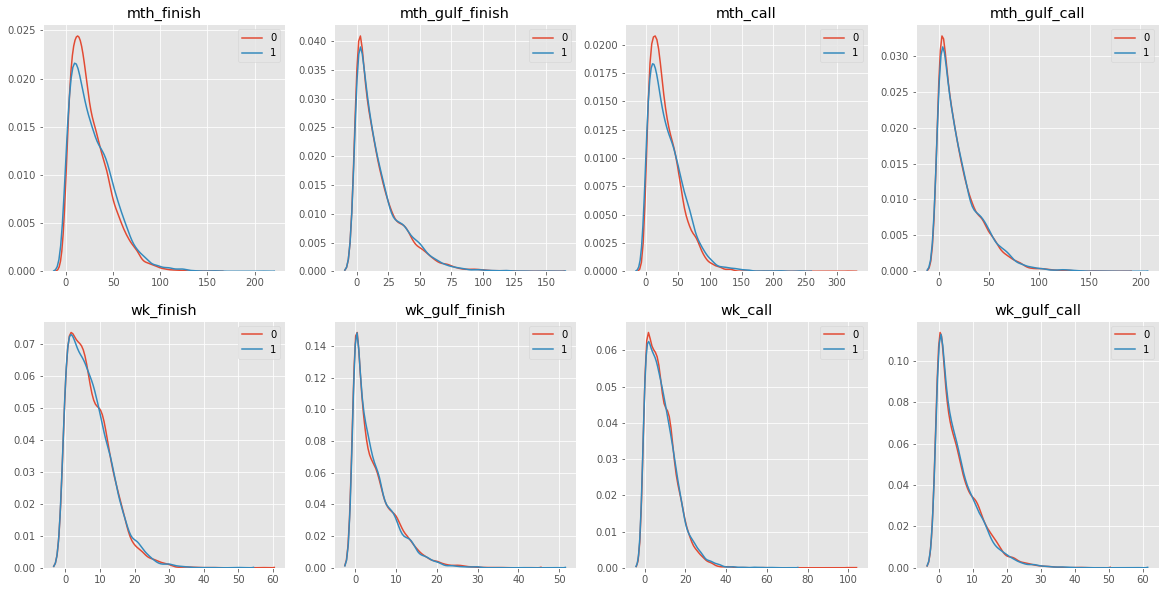

In [229]:
#验证匹配效果，每个用于拟合的变量分布应该一致
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs = axs.flatten()
l=['mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call'
  ]

for i in range(len(l)):
    sns.kdeplot(matched_data[matched_data.is_member==0][l[i]],label='0',ax=axs[i])
    sns.kdeplot(matched_data[matched_data.is_member==1][l[i]],label='1',ax=axs[i])
    axs[i].set_title(l[i])

In [230]:
#匹配后详细数据
total_matched_data.head(10)

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,is_member,scores
0,0,13121403,2022-05-29,first_wk,20.0,11.0,25.0,12.0,9.0,3.0,10.0,4.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,1,0.772254
407798,402269,7864422,2022-01-01,first_wk,18.0,12.0,20.0,14.0,8.0,3.0,10.0,5.0,1.0,5.0,0.0,4.0,2.0,0.0,1.0,1.0,0,0.772249
1,1,102766175,2022-05-30,first_wk,26.0,1.0,32.0,1.0,7.0,1.0,11.0,1.0,1.0,5.0,11.0,3.0,8.0,4.0,3.0,3.0,1,0.633816
236056,230527,1293439016963,2022-01-01,first_wk,12.0,5.0,16.0,9.0,3.0,1.0,6.0,4.0,1.0,2.0,7.0,5.0,1.0,4.0,1.0,0.0,0,0.633815
2,2,225487036417,2022-05-26,first_wk,14.0,6.0,14.0,6.0,3.0,2.0,3.0,2.0,1.0,2.0,3.0,3.0,1.0,3.0,3.0,1.0,1,0.656003
219548,214019,115659815,2022-01-01,first_wk,14.0,6.0,14.0,6.0,3.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.656003
3,3,265421520898,2022-05-31,first_wk,9.0,8.0,10.0,10.0,1.0,1.0,2.0,2.0,0.0,2.0,7.0,1.0,3.0,5.0,0.0,3.0,1,0.315948
94651,89122,3110570433695,2022-01-01,first_wk,9.0,8.0,10.0,10.0,1.0,1.0,2.0,2.0,0.0,23.0,4.0,0.0,0.0,3.0,0.0,0.0,0,0.315948
4,4,1001568145409,2022-05-27,first_wk,54.0,52.0,76.0,76.0,10.0,10.0,13.0,13.0,1.0,11.0,23.0,16.0,10.0,23.0,16.0,10.0,1,0.965152
300843,295314,5000120293066,2022-01-01,first_wk,48.0,37.0,49.0,40.0,18.0,11.0,19.0,11.0,1.0,23.0,12.0,7.0,9.0,8.0,7.0,7.0,0,0.965150


In [296]:
#匹配结果&评估结果
total_matched_data=matched_data
total=pd.DataFrame(total_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
total['delta']=total.iloc[:,1]-total.iloc[:,0]
total['delta_percentage']=total.iloc[:,1]/total.iloc[:,0]-1
total

is_member,0,1,delta,delta_percentage
city_id,5.924941,7.847712,1.922771e+00,3.245215e-01
passenger_id,5529.000000,5529.000000,0.000000e+00,0.000000e+00
scores,0.659815,0.659815,-6.102949e-08,-9.249488e-08
mth_finish,27.046301,28.875927,1.829626e+00,6.764790e-02
mth_gulf_finish,17.572617,17.961476,3.888587e-01,2.212868e-02
wk_finish,7.215771,7.473865,2.580937e-01,3.576800e-02
wk_gulf_finish,4.799602,4.704106,-9.549647e-02,-1.989675e-02
is_new_core_rolling,0.694339,0.681859,-1.247965e-02,-1.797343e-02
wk1_gulf_finish_after,3.937602,6.042865,2.105263e+00,5.346562e-01
wk2_gulf_finish_after,3.410924,4.811720,1.400796e+00,4.106793e-01


In [315]:
total_matched_data[['passenger_id','is_member','city_id']].to_csv('/Users/didi/Desktop/first_wk_psm_match.csv',
                                                                  index=False)

## 二、安慰剂检验
### placebo 1: fake treatment 
fake data differences are less than 5%

In [238]:
fake_treat=control.head(5000)
fake_treat['is_member']=1
fake_ctrl=control.loc[5001:]

fake_df=pd.concat([fake_treat,fake_ctrl])
fake_df=fake_df.drop_duplicates()  # 数据去重
fake_df=fake_df.fillna(0)
fake_df=fake_df.reset_index()
fake_df.head()

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after,is_member
0,0,35184515813906,2022-01-01,first_wk,40,40,44,44,9,9,9,9,1.0,2,11.0,15.0,15.0,17.0,7.0,5.0,14.0,17.0,1
1,1,933862899714,2022-01-01,first_wk,38,38,42,42,6,6,7,7,1.0,2,6.0,23.0,15.0,4.0,6.0,23.0,15.0,4.0,1
2,2,35184573166018,2022-01-01,first_wk,32,31,33,33,9,9,9,9,1.0,2,21.0,3.0,7.0,4.0,19.0,3.0,6.0,4.0,1
3,3,5000039009161,2022-01-01,first_wk,40,38,42,39,9,9,10,10,1.0,2,10.0,14.0,12.0,18.0,10.0,14.0,10.0,18.0,1
4,4,1255295811587,2022-01-01,first_wk,32,31,32,31,11,11,11,11,1.0,2,3.0,4.0,3.0,7.0,3.0,4.0,3.0,6.0,1


In [239]:
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=fake_df
#data_p=df[df.city_id==2]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7839, 0.7873, 0.7918, 0.7884, 0.7843, 0.7837]


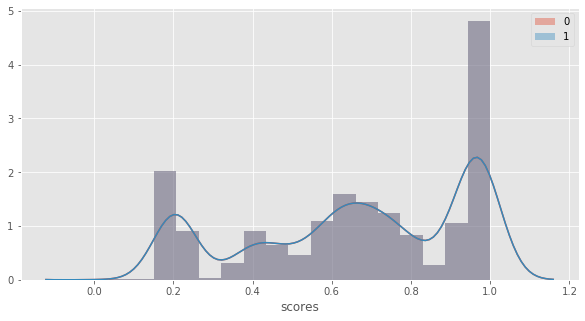

In [240]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

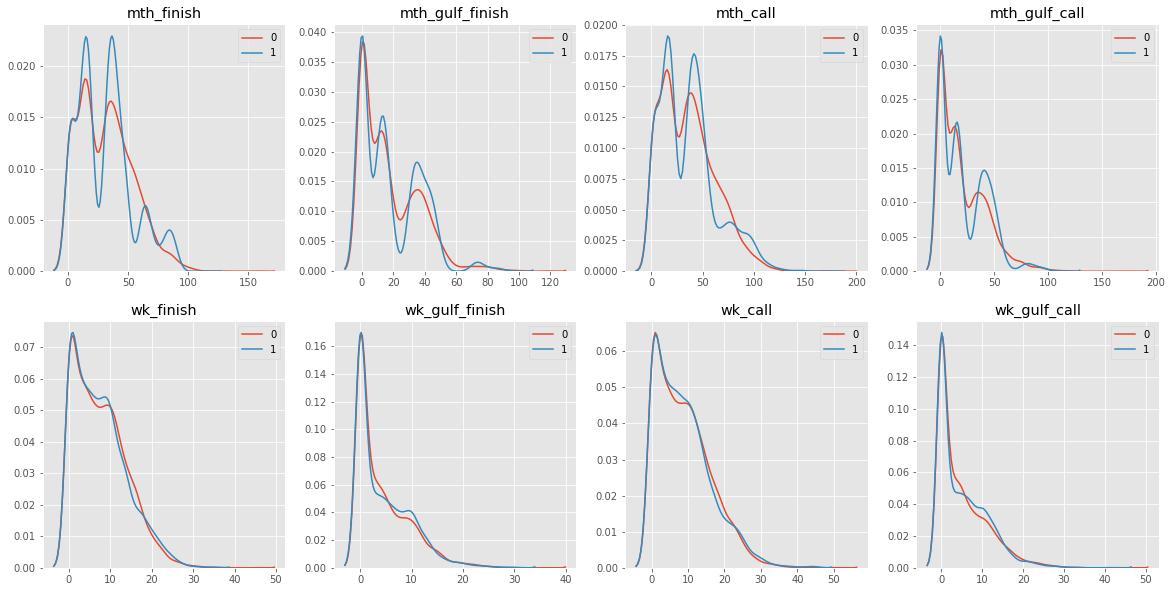

In [242]:
#验证匹配效果，每个用于拟合的变量分布应该一致
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs = axs.flatten()
l=['mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call'
  ]

for i in range(len(l)):
    sns.kdeplot(matched_data[matched_data.is_member==0][l[i]],label='0',ax=axs[i])
    sns.kdeplot(matched_data[matched_data.is_member==1][l[i]],label='1',ax=axs[i])
    axs[i].set_title(l[i])

In [243]:
#匹配结果&评估结果
fake_matched_data=matched_data
fake=pd.DataFrame(fake_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
fake['delta']=fake.iloc[:,1]-fake.iloc[:,0]
fake['delta_percentage']=fake.iloc[:,1]/fake.iloc[:,0]-1
fake

is_member,0,1,delta,delta_percentage
city_id,7.000400,3.979000,-3.021400e+00,-4.316039e-01
passenger_id,5000.000000,5000.000000,0.000000e+00,0.000000e+00
scores,0.665013,0.665013,-5.080857e-09,-7.640237e-09
mth_finish,31.759200,31.186200,-5.730000e-01,-1.804202e-02
mth_gulf_finish,17.681600,18.225000,5.434000e-01,3.073251e-02
wk_finish,7.666800,7.602600,-6.420000e-02,-8.373767e-03
wk_gulf_finish,4.291800,4.441600,1.498000e-01,3.490377e-02
is_new_core_rolling,0.630600,0.589400,-4.120000e-02,-6.533460e-02
wk1_gulf_finish_after,3.865000,4.013800,1.488000e-01,3.849935e-02
wk2_gulf_finish_after,3.292400,3.388800,9.640000e-02,2.927955e-02


## placebo 2: add new variable
differences dont change much

In [247]:
import random
df_new=df
df_new['new_v']=[random.random()*10 for i in range(df.shape[0])]
df_new.head()

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after,is_member,scores,new_v
0,0,379401,2022-06-01,first_wk,19.0,7.0,25.0,10.0,2.0,0.0,2.0,0.0,1.0,2.0,7.0,6.0,1.0,8.0,4.0,4.0,1.0,5.0,1,0.604417,3.066840
1,1,1567137,2022-05-27,first_wk,14.0,14.0,14.0,14.0,4.0,4.0,4.0,4.0,1.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,4.0,5.0,1,0.774604,3.301564
2,2,1738957,2022-05-29,first_wk,17.0,10.0,17.0,10.0,3.0,3.0,3.0,3.0,1.0,5.0,14.0,2.0,2.0,8.0,8.0,1.0,2.0,7.0,1,0.712723,4.031342
3,3,2300155,2022-05-27,first_wk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0.222358,3.444611
4,4,2603139,2022-05-26,first_wk,66.0,66.0,69.0,68.0,20.0,20.0,22.0,22.0,1.0,2.0,18.0,6.0,13.0,14.0,18.0,6.0,13.0,14.0,1,0.996800,1.822579


In [248]:
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling','new_v']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df_new
#data_p=df[df.city_id==2]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7665943208536806, 0.7617109784771207, 0.7618918430095858, 0.7608970880810273, 0.7632483270030747, 0.7614396816784229]


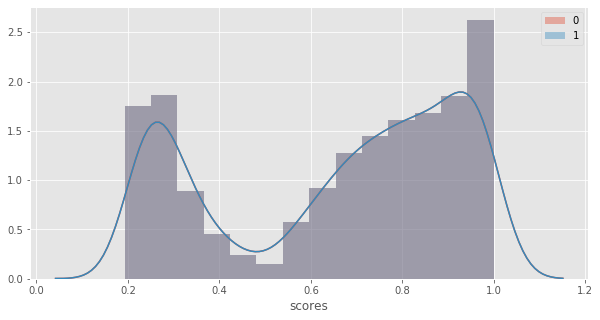

In [250]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [249]:
fake_matched_data2=matched_data
fake2=pd.DataFrame(fake_matched_data2.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
fake2['delta']=fake2.iloc[:,1]-fake2.iloc[:,0]
fake2['delta_percentage']=fake2.iloc[:,1]/fake2.iloc[:,0]-1
fake2

is_member,0,1,delta,delta_percentage
city_id,6.022608,7.847712,1.825104e+00,3.030421e-01
passenger_id,5529.000000,5529.000000,0.000000e+00,0.000000e+00
scores,0.657784,0.657784,1.074997e-08,1.634269e-08
mth_finish,27.748237,28.875927,1.127690e+00,4.064007e-02
mth_gulf_finish,17.376922,17.961476,5.845542e-01,3.363968e-02
wk_finish,7.472599,7.473865,1.266052e-03,1.694259e-04
wk_gulf_finish,4.746066,4.704106,-4.196057e-02,-8.841126e-03
is_new_core_rolling,0.693977,0.681859,-1.211792e-02,-1.746156e-02
wk1_gulf_finish_after,3.856574,6.042865,2.186290e+00,5.668996e-01
wk2_gulf_finish_after,3.253391,4.811720,1.558329e+00,4.789860e-01


## 三、分城市效果

### 深圳

In [251]:
#PSM shenzhen
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==2]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7741865509761389, 0.7759219088937094, 0.7709327548806941, 0.7746203904555314, 0.7796095444685467, 0.7746203904555314]


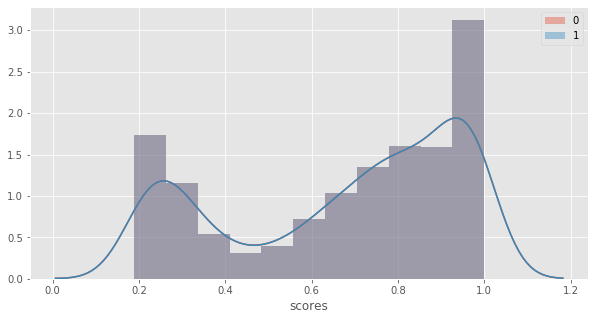

In [253]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [252]:
shenzhen_matched_data=matched_data
shenzhen=pd.DataFrame(shenzhen_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T

shenzhen['delta']=shenzhen.iloc[:,1]-shenzhen.iloc[:,0]
shenzhen['delta_percentage']=shenzhen.iloc[:,1]/shenzhen.iloc[:,0]-1
shenzhen

is_member,0,1,delta,delta_percentage
city_id,2.000000,2.000000,0.000000e+00,0.000000e+00
passenger_id,2305.000000,2305.000000,0.000000e+00,0.000000e+00
scores,0.674851,0.674850,-1.548307e-07,-2.294296e-07
mth_finish,29.584382,31.340998,1.756616e+00,5.937647e-02
mth_gulf_finish,19.720607,19.868980,1.483731e-01,7.523759e-03
wk_finish,7.677657,7.860738,1.830803e-01,2.384585e-02
wk_gulf_finish,5.190889,5.012148,-1.787419e-01,-3.443377e-02
is_new_core_rolling,0.714967,0.704989,-9.978308e-03,-1.395631e-02
wk1_gulf_finish_after,4.355748,6.172234,1.816486e+00,4.170319e-01
wk2_gulf_finish_after,3.714534,5.002603,1.288069e+00,3.467648e-01


### 杭州

In [254]:
#PSM hangzhou
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==5]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7875523638539796, 0.7860562537402753, 0.7863554757630161, 0.7911430281268701, 0.7908438061041293, 0.7902453620586475]


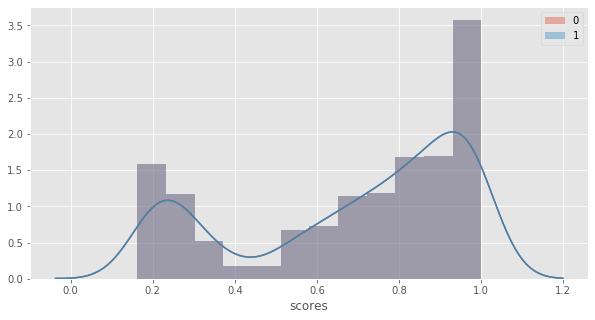

In [255]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [256]:
hangzhou_matched_data=matched_data
hangzhou=pd.DataFrame(hangzhou_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T
hangzhou['delta']=hangzhou.iloc[:,1]-hangzhou.iloc[:,0]
hangzhou['delta_percentage']=hangzhou.iloc[:,1]/hangzhou.iloc[:,0]-1
hangzhou

is_member,0,1,delta,delta_percentage
city_id,5.000000,5.000000,0.000000e+00,0.000000
passenger_id,1671.000000,1671.000000,0.000000e+00,0.000000
scores,0.686916,0.686916,7.141796e-07,0.000001
mth_finish,28.159785,29.889886,1.730102e+00,0.061439
mth_gulf_finish,19.347098,19.848594,5.014961e-01,0.025921
wk_finish,7.591861,7.815081,2.232196e-01,0.029402
wk_gulf_finish,5.353680,5.277080,-7.660084e-02,-0.014308
is_new_core_rolling,0.757032,0.737283,-1.974865e-02,-0.026087
wk1_gulf_finish_after,4.465589,6.399162,1.933573e+00,0.432994
wk2_gulf_finish_after,3.765410,5.142430,1.377020e+00,0.365702


### 武汉

In [257]:
#PSM wuhan
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==6]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.762906309751434, 0.777246653919694, 0.765774378585086, 0.7676864244741873, 0.7581261950286807, 0.7734225621414914]


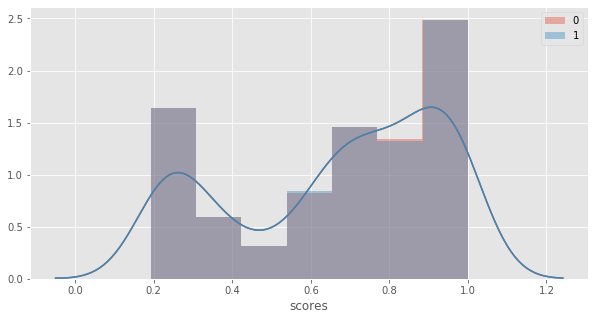

In [258]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [259]:
wuhan_matched_data=matched_data
wuhan=pd.DataFrame(wuhan_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T
wuhan['delta']=wuhan.iloc[:,1]-wuhan.iloc[:,0]
wuhan['delta_percentage']=wuhan.iloc[:,1]/wuhan.iloc[:,0]-1
wuhan

is_member,0,1,delta,delta_percentage
city_id,6.000000,6.000000,0.000000,0.000000
passenger_id,523.000000,523.000000,0.000000,0.000000
scores,0.665364,0.665369,0.000005,0.000008
mth_finish,26.613767,28.780115,2.166348,0.081400
mth_gulf_finish,16.565966,17.411090,0.845124,0.051016
wk_finish,7.026769,7.246654,0.219885,0.031293
wk_gulf_finish,4.464627,4.397706,-0.066922,-0.014989
is_new_core_rolling,0.717017,0.718929,0.001912,0.002667
wk1_gulf_finish_after,3.548757,5.657744,2.108987,0.594289
wk2_gulf_finish_after,3.181644,4.569790,1.388145,0.436298


### 苏州

In [260]:
#PSM suzhou
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==23]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7150735294117647, 0.7371323529411765, 0.71875, 0.7205882352941176, 0.7242647058823529, 0.7242647058823529]


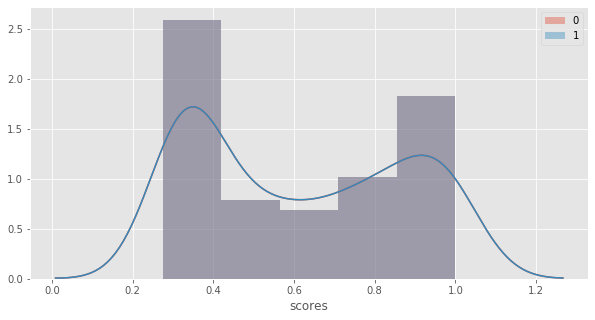

In [261]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [262]:
suzhou_matched_data=matched_data
suzhou=pd.DataFrame(suzhou_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T
suzhou['delta']=suzhou.iloc[:,1]-suzhou.iloc[:,0]
suzhou['delta_percentage']=suzhou.iloc[:,1]/suzhou.iloc[:,0]-1
suzhou

is_member,0,1,delta,delta_percentage
city_id,23.000000,23.000000,0.000000,0.000000
passenger_id,272.000000,272.000000,0.000000,0.000000
scores,0.613647,0.613654,0.000007,0.000011
mth_finish,18.988971,19.915441,0.926471,0.048790
mth_gulf_finish,9.544118,10.036765,0.492647,0.051618
wk_finish,6.639706,6.327206,-0.312500,-0.047065
wk_gulf_finish,3.529412,3.279412,-0.250000,-0.070833
is_new_core_rolling,0.496324,0.455882,-0.040441,-0.081481
wk1_gulf_finish_after,2.783088,4.580882,1.797794,0.645971
wk2_gulf_finish_after,2.117647,4.121324,2.003676,0.946181


### 泉州
人数太少，结果仅供参考

In [263]:
#PSM quanzhou
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==35]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.6756756756756757, 0.6891891891891891, 0.7364864864864865, 0.7432432432432432, 0.722972972972973, 0.7094594594594594]


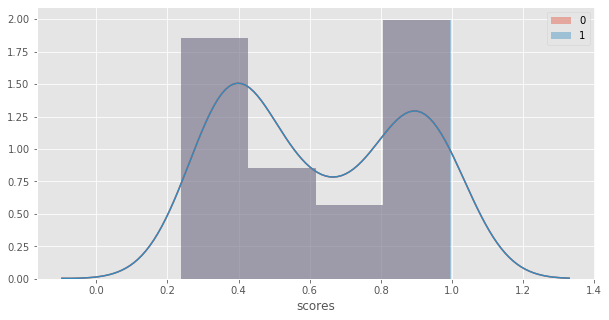

In [264]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [266]:
quanzhou_matched_data=matched_data
quanzhou=pd.DataFrame(quanzhou_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T
quanzhou['delta']=quanzhou.iloc[:,1]-quanzhou.iloc[:,0]
quanzhou['delta_percentage']=quanzhou.iloc[:,1]/quanzhou.iloc[:,0]-1
quanzhou

is_member,0,1,delta,delta_percentage
city_id,35.000000,35.000000,0.000000,0.000000
passenger_id,74.000000,74.000000,0.000000,0.000000
scores,0.629061,0.629071,0.000010,0.000017
mth_finish,14.878378,17.229730,2.351351,0.158038
mth_gulf_finish,6.554054,7.810811,1.256757,0.191753
wk_finish,4.783784,4.270270,-0.513514,-0.107345
wk_gulf_finish,1.878378,1.864865,-0.013514,-0.007194
is_new_core_rolling,0.432432,0.432432,0.000000,0.000000
wk1_gulf_finish_after,1.364865,3.689189,2.324324,1.702970
wk2_gulf_finish_after,1.243243,2.689189,1.445946,1.163043


### 金华
人数太少，结果仅供参考

In [267]:
#PSM quanzhou
# x_field是用于拟合的变量
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.city_id==86]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.7075471698113207, 0.6981132075471698, 0.6981132075471698, 0.6792452830188679, 0.6792452830188679, 0.7169811320754716]


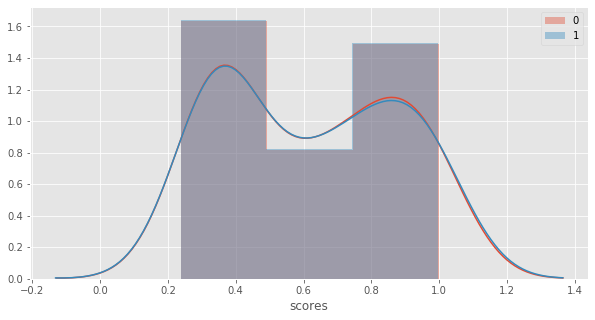

In [268]:
# 验证匹配效果，score分布需要一致
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [269]:
jinhua_matched_data=matched_data
jinhua=pd.DataFrame(jinhua_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                      })).T
jinhua['delta']=jinhua.iloc[:,1]-jinhua.iloc[:,0]
jinhua['delta_percentage']=jinhua.iloc[:,1]/jinhua.iloc[:,0]-1
jinhua

is_member,0,1,delta,delta_percentage
city_id,86.000000,86.000000,0.000000,0.000000
passenger_id,53.000000,53.000000,0.000000,0.000000
scores,0.617034,0.618102,0.001068,0.001731
mth_finish,19.981132,25.641509,5.660377,0.283286
mth_gulf_finish,8.245283,10.716981,2.471698,0.299771
wk_finish,5.339623,7.037736,1.698113,0.318021
wk_gulf_finish,2.358491,2.849057,0.490566,0.208000
is_new_core_rolling,0.452830,0.471698,0.018868,0.041667
wk1_gulf_finish_after,1.773585,4.169811,2.396226,1.351064
wk2_gulf_finish_after,1.056604,3.547170,2.490566,2.357143


## 四、分人群效果

In [297]:
total_matched_data.head()

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after,is_member,scores,new_v
0,0,379401,2022-06-01,first_wk,19.0,7.0,25.0,10.0,2.0,0.0,2.0,0.0,1.0,2.0,7.0,6.0,1.0,8.0,4.0,4.0,1.0,5.0,1,0.608101,3.066840
250586,245057,1648707241066,2022-01-01,first_wk,17.0,7.0,20.0,8.0,1.0,0.0,1.0,0.0,1.0,5.0,5.0,2.0,9.0,14.0,1.0,0.0,0.0,1.0,0,0.608103,6.335199
1,1,1567137,2022-05-27,first_wk,14.0,14.0,14.0,14.0,4.0,4.0,4.0,4.0,1.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,4.0,5.0,1,0.775588,3.301564
282884,277355,3261887,2022-01-01,first_wk,14.0,14.0,14.0,14.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,3.0,0,0.775588,4.414743
2,2,1738957,2022-05-29,first_wk,17.0,10.0,17.0,10.0,3.0,3.0,3.0,3.0,1.0,5.0,14.0,2.0,2.0,8.0,8.0,1.0,2.0,7.0,1,0.716639,4.031342


In [298]:
t=total_matched_data[total_matched_data.is_member==1].reset_index(drop=True)
c=total_matched_data[total_matched_data.is_member==0].reset_index(drop=True)

### 高频中高渗

In [309]:
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.is_new_core_rolling==1]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.669761273209549, 0.6591511936339522, 0.6620689655172414, 0.6628647214854111, 0.6608753315649868, 0.6672413793103448]


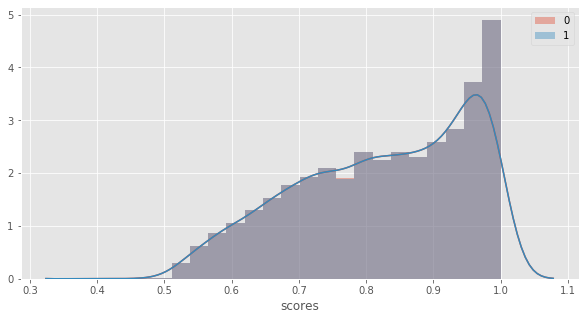

In [303]:
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

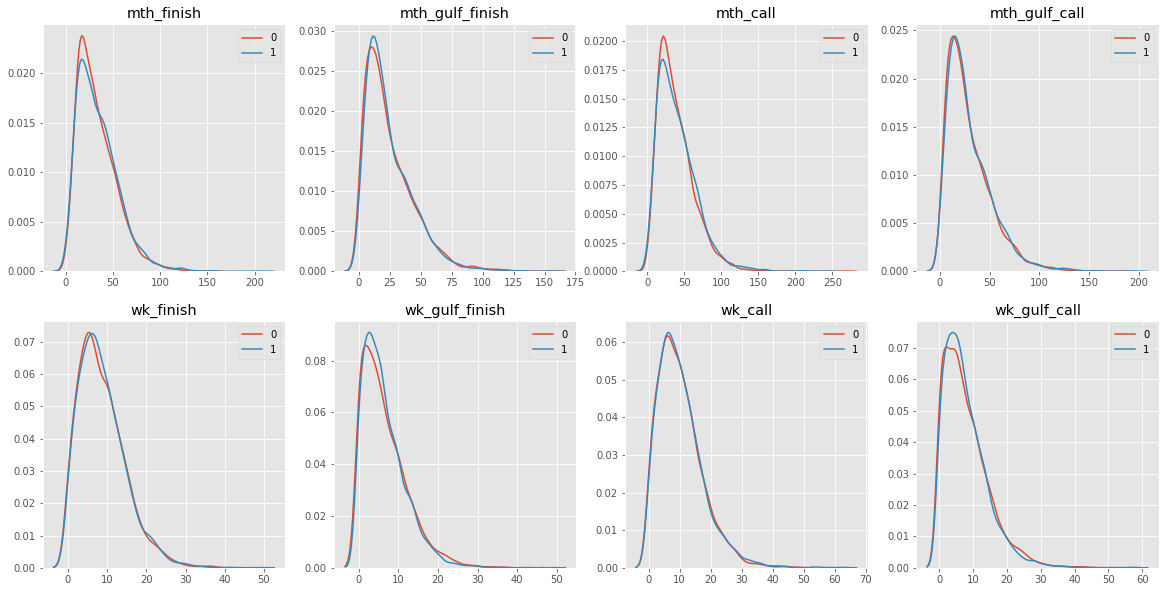

In [311]:
#验证匹配效果，每个用于拟合的变量分布应该一致
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs = axs.flatten()
l=['mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call'
  ]

for i in range(len(l)):
    sns.kdeplot(matched_data[matched_data.is_member==0][l[i]],label='0',ax=axs[i])
    sns.kdeplot(matched_data[matched_data.is_member==1][l[i]],label='1',ax=axs[i])
    axs[i].set_title(l[i])

In [310]:
core_matched=matched_data

#匹配结果&评估结果
core=pd.DataFrame(core_matched.groupby('is_member').agg({
    'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',    
                                        'is_new_core_rolling':'mean',
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
core['delta']=core.iloc[:,1]-core.iloc[:,0]
core['delta_percentage']=core.iloc[:,1]/core.iloc[:,0]-1
core

is_member,0,1,delta,delta_percentage
city_id,4.919894,6.319629,1.399735e+00,0.284505
passenger_id,3770.000000,3770.000000,0.000000e+00,0.000000
scores,0.567190,0.567191,6.145189e-07,0.000001
is_new_core_rolling,1.000000,1.000000,0.000000e+00,0.000000
mth_finish,32.953050,34.237666,1.284615e+00,0.038983
mth_gulf_finish,24.477454,24.740318,2.628647e-01,0.010739
wk_finish,8.655438,8.731830,7.639257e-02,0.008826
wk_gulf_finish,6.529443,6.344828,-1.846154e-01,-0.028274
wk1_gulf_finish_after,5.535279,7.443236,1.907958e+00,0.344690
wk2_gulf_finish_after,4.662069,6.168700,1.506631e+00,0.323168


### 非高频中高渗

In [305]:
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df[df.is_new_core_rolling==0]  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.6472427515633883, 0.6424104604889141, 0.6515065378055713, 0.6463899943149517, 0.6560545764639, 0.6546333143831723]


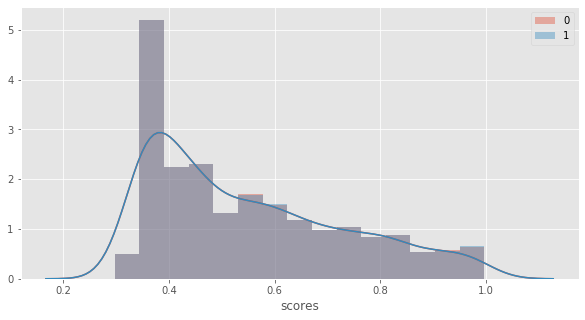

In [306]:
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

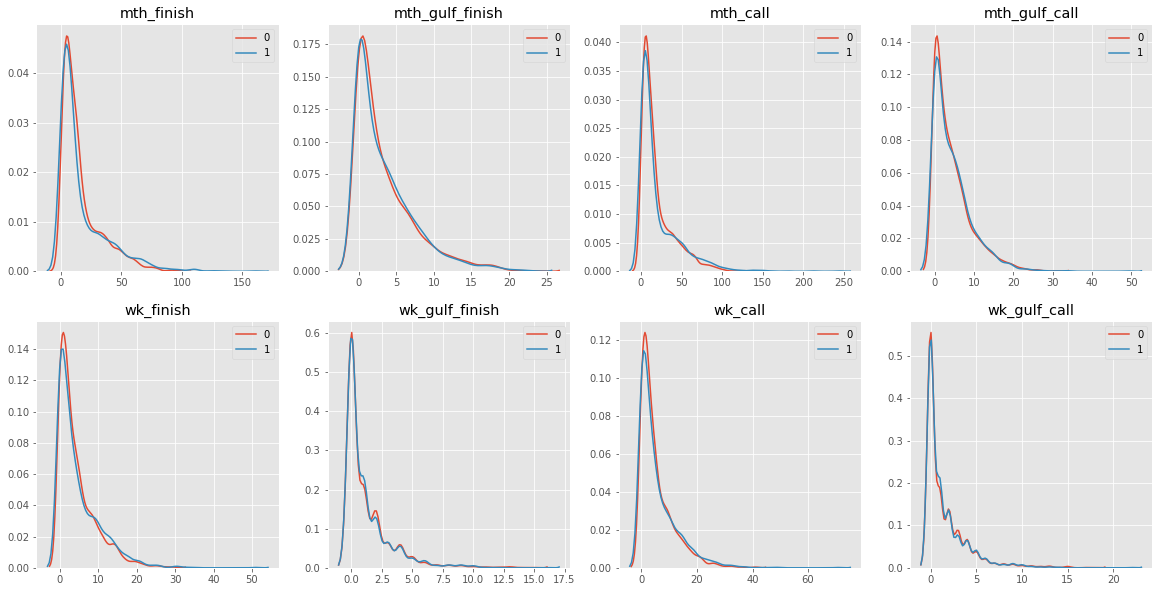

In [307]:
#验证匹配效果，每个用于拟合的变量分布应该一致
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs = axs.flatten()
l=['mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call'
  ]

for i in range(len(l)):
    sns.kdeplot(matched_data[matched_data.is_member==0][l[i]],label='0',ax=axs[i])
    sns.kdeplot(matched_data[matched_data.is_member==1][l[i]],label='1',ax=axs[i])
    axs[i].set_title(l[i])

In [308]:
non_core_matched=matched_data

#匹配结果&评估结果
core_none=pd.DataFrame(non_core_matched.groupby('is_member').agg({
    'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',    
                                        'is_new_core_rolling':'mean',
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
core_none['delta']=core_none.iloc[:,1]-core_none.iloc[:,0]
core_none['delta_percentage']=core_none.iloc[:,1]/core_none.iloc[:,0]-1
core_none

is_member,0,1,delta,delta_percentage
city_id,7.371234,11.122797,3.751563,0.508946
passenger_id,1759.000000,1759.000000,0.000000,0.000000
scores,0.550371,0.550372,0.000001,0.000002
is_new_core_rolling,0.000000,0.000000,0.000000,NaN
mth_finish,16.276293,17.384309,1.108016,0.068075
mth_gulf_finish,3.419557,3.432632,0.013076,0.003824
wk_finish,4.474133,4.777715,0.303582,0.067853
wk_gulf_finish,1.229676,1.187607,-0.042069,-0.034212
wk1_gulf_finish_after,0.682206,3.041501,2.359295,3.458333
wk2_gulf_finish_after,0.613417,1.903354,1.289937,2.102873


## 五、总体评估 (第二周）

In [332]:
treated = pd.read_csv('/Users/didi/Downloads/second_wk_test.csv').fillna(0)
treated['is_member']=1
control = pd.read_csv('/Users/didi/Downloads/second_wk_ctrl.csv').fillna(0)
control['is_member']=0
control=control.drop(['mth_finish_cat','mth_gulf_finish_cat','rk'],axis=1)

df=pd.concat([treated,control])
df=df.drop_duplicates()  # 数据去重
df=df.fillna(0)
df=df.reset_index()
df.head()

,index,passenger_id,dt,period,mth_finish,mth_gulf_finish,mth_call,mth_gulf_call,wk_finish,wk_gulf_finish,wk_call,wk_gulf_call,is_new_core_rolling,city_id,wk1_finish_after,wk2_finish_after,wk3_finish_after,wk4_finish_after,wk1_gulf_finish_after,wk2_gulf_finish_after,wk3_gulf_finish_after,wk4_gulf_finish_after,is_member
0,0,793738,2022-06-06,second_wk,3.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1,2585240,2022-06-03,second_wk,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1
2,2,5861770,2022-06-07,second_wk,7.0,1.0,8.0,2.0,1.0,0.0,2.0,1.0,0.0,5,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1
3,3,6138905,2022-06-08,second_wk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,3.0,7.0,7.0,0.0,2.0,6.0,2.0,0.0,1
4,4,11698634,2022-06-08,second_wk,13.0,4.0,14.0,4.0,5.0,2.0,5.0,2.0,1.0,6,2.0,5.0,1.0,0.0,2.0,5.0,0.0,0.0,1


In [334]:
X_field=[ 'mth_finish', 'mth_gulf_finish',
       'mth_call', 'mth_gulf_call', 'wk_finish', 'wk_gulf_finish', 'wk_call',
       'wk_gulf_call','is_new_core_rolling']
Y_field=['is_member']
field=X_field+Y_field
output=pd.DataFrame()


data_p=df  ## 限制城市，如果评整体 data_p=df
c=data_p[(data_p.is_member==0)]
t=data_p[(data_p.is_member==1)]


y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))



i=0
nmodels=5
errors=0
model_accuracy = []
models = []

while i <= nmodels and errors < 5:
    if len(t)>len(c):
        d = c.append(t).dropna()
    else: 
        d = c.sample(len(t),replace=False).append(t).dropna() #模型选择相同的对照组和控制组样本
        
    y_samp, X_samp = patsy.dmatrices(formula, data=d, return_type='dataframe')   #选出模型的自变量和因变量   
    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    
    try:
        res = glm.fit(method="bfgs")
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1
    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))
    
## 匹配最近
scores = np.zeros(len(x_f))
for j in range(nmodels):
    m = models[j]
    scores += m.predict(x_f)
        
data_p['scores'] = scores/nmodels
nmatches=1
treat_scores = data_p[data_p[Y_field[0]]==1][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==0][['scores']]
    
result, match_ids = [], []
for p in range(len(treat_scores)):
    score = treat_scores.iloc[p]
    matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    min_gap=abs(ctrl_scores - score).min()[0]
    if min_gap>0.1:
        break
    elif score is None:
        break       
    else:
        result.extend([treat_scores.index[p]] + list(matches.index))
        match_ids.extend([p] *2)
        ctrl_scores=ctrl_scores.drop(matches.index,axis=0)
        
        
## 匹配结果    
matched_data =data_p.loc[result]

print(model_accuracy)


[0.6741011084076778, 0.6753176534198432, 0.6785617734522844, 0.6789672884563396, 0.6728845633955123, 0.6732900783995674]


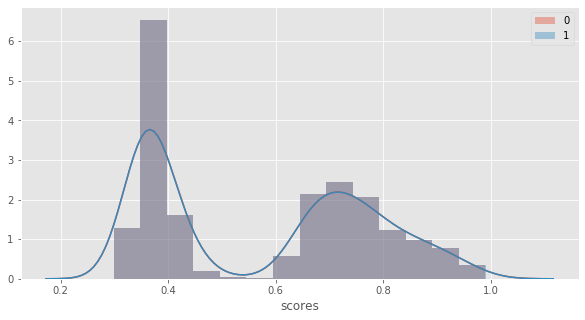

In [335]:
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data.is_member==0]['scores'],label='0')
sns.distplot(matched_data[matched_data.is_member==1]['scores'],label='1')
plt.legend()

In [336]:
total_matched_data=matched_data
total=pd.DataFrame(total_matched_data.groupby('is_member').agg({'city_id':'mean',
                                       'passenger_id':'count',
                                        'scores':'mean',                           
                                       'mth_finish':'mean',
                                       'mth_gulf_finish':'mean',
                                       'wk_finish':'mean',
                                       'wk_gulf_finish':'mean',
                                       'is_new_core_rolling':'mean',
                                       'wk1_gulf_finish_after':'mean',
                                        'wk2_gulf_finish_after':'mean',
                                        'wk3_gulf_finish_after':'mean',
                                        'wk4_gulf_finish_after':'mean'
                                                                
                                      })).T
total['delta']=total.iloc[:,1]-total.iloc[:,0]
total['delta_percentage']=total.iloc[:,1]/total.iloc[:,0]-1
total

is_member,0,1,delta,delta_percentage
city_id,7.402812,11.000811,3.597999e+00,4.860315e-01
passenger_id,3699.000000,3699.000000,0.000000e+00,0.000000e+00
scores,0.574933,0.574933,3.176857e-08,5.525611e-08
mth_finish,22.470397,22.900514,4.301162e-01,1.914146e-02
mth_gulf_finish,11.523385,11.665856,1.424709e-01,1.236364e-02
wk_finish,5.769938,5.642606,-1.273317e-01,-2.206813e-02
wk_gulf_finish,2.910516,2.852663,-5.785347e-02,-1.987739e-02
is_new_core_rolling,0.521222,0.521222,0.000000e+00,0.000000e+00
wk1_gulf_finish_after,2.274398,4.600162,2.325764e+00,1.022584e+00
wk2_gulf_finish_after,2.435793,4.009462,1.573669e+00,6.460599e-01


In [337]:
total_matched_data[['passenger_id','is_member','city_id']].to_csv('/Users/didi/Desktop/second_wk_psm_match.csv',
                                                                  index=False)